In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency
from sklearn.metrics import roc_curve, auc
from google.colab import files
from scipy import stats

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving Fourth_task.csv to Fourth_task (1).csv


In [ ]:
# Use the uploaded file in colab
ruf4 = pd.read_csv("Fourth_task.csv")
ruf4.head()

,L_distraction_defect_MRU,L_distraction_defect_RGU,Surgical_Steps
0,2.60,2.70,2
1,1.90,2.16,2
2,2.24,2.88,2
3,2.89,4.59,2
4,4.95,4.60,4


In [ ]:
# Check column names to ensure 'Surgical_Steps' is correctly referenced
print("Columns in DataFrame:", ruf4.columns)

# Strip any leading/trailing spaces from the column names to avoid referencing issues
ruf4.columns = ruf4.columns.str.strip()

Columns in DataFrame: Index(['L_distraction_defect_MRU', 'L_distraction_defect_RGU',
       'Surgical_Steps'],
      dtype='object')


In [ ]:
# Separate the data based on the surgical_steps value
surgical_steps_1 = ruf4[ruf4['Surgical_Steps'] == 1]
surgical_steps_2 = ruf4[ruf4['Surgical_Steps'] == 2]
surgical_steps_3 = ruf4[ruf4['Surgical_Steps'] == 3]
surgical_steps_4 = ruf4[ruf4['Surgical_Steps'] == 4]


# Remove 'Surgical_Steps' column from calculation
surgical_steps_1 = surgical_steps_1.drop(columns='Surgical_Steps')
surgical_steps_2 = surgical_steps_2.drop(columns='Surgical_Steps')
surgical_steps_3 = surgical_steps_3.drop(columns='Surgical_Steps')
surgical_steps_4 = surgical_steps_4.drop(columns='Surgical_Steps')


# Use describe function to get statistical summary for both groups
describe_steps_1 = surgical_steps_1.describe()
describe_steps_2 = surgical_steps_2.describe()
describe_steps_3 = surgical_steps_3.describe()
describe_steps_4 = surgical_steps_4.describe()

In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 1:")
print(describe_steps_1)

Statistical Summary for Surgical Steps 1:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                  5.000000                  5.000000
mean                   1.838000                  2.274000
std                    0.429791                  0.505846
min                    1.450000                  1.670000
25%                    1.500000                  2.000000
50%                    1.740000                  2.200000
75%                    2.000000                  2.500000
max                    2.500000                  3.000000


In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 2:")
print(describe_steps_2)

Statistical Summary for Surgical Steps 2:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                  8.000000                   8.00000
mean                   2.453750                   2.89875
std                    0.684521                   0.92487
min                    1.830000                   1.96000
25%                    1.885000                   2.26500
50%                    2.360000                   2.65000
75%                    2.672500                   3.16000
max                    3.850000                   4.59000


In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 3:")
print(describe_steps_3)

Statistical Summary for Surgical Steps 3:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                  2.000000                  2.000000
mean                   3.400000                  4.000000
std                    0.848528                  0.707107
min                    2.800000                  3.500000
25%                    3.100000                  3.750000
50%                    3.400000                  4.000000
75%                    3.700000                  4.250000
max                    4.000000                  4.500000


In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 4:")
print(describe_steps_4)

Statistical Summary for Surgical Steps 4:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                  5.000000                  5.000000
mean                   3.608000                  3.862000
std                    1.601427                  1.412876
min                    1.770000                  2.260000
25%                    1.960000                  2.400000
50%                    4.500000                  4.600000
75%                    4.860000                  4.900000
max                    4.950000                  5.150000


In [ ]:
# Extract only count and mean for each surgical step
count_mean_steps_1 = describe_steps_1.loc[['count', 'mean']]
count_mean_steps_2 = describe_steps_2.loc[['count', 'mean']]
count_mean_steps_3 = describe_steps_3.loc[['count', 'mean']]
count_mean_steps_4 = describe_steps_4.loc[['count', 'mean']]

# Display the results
print("Count and Mean for Surgical Steps 1:")
print(count_mean_steps_1)

print("\nCount and Mean for Surgical Steps 2:")
print(count_mean_steps_2)

print("\nCount and Mean for Surgical Steps 3:")
print(count_mean_steps_3)

print("\nCount and Mean for Surgical Steps 4:")
print(count_mean_steps_4)

Count and Mean for Surgical Steps 1:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                     5.000                     5.000
mean                      1.838                     2.274

Count and Mean for Surgical Steps 2:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                   8.00000                   8.00000
mean                    2.45375                   2.89875

Count and Mean for Surgical Steps 3:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                       2.0                       2.0
mean                        3.4                       4.0

Count and Mean for Surgical Steps 4:
       L_distraction_defect_MRU  L_distraction_defect_RGU
count                     5.000                     5.000
mean                      3.608                     3.862


In [ ]:
# Calculate the new means for combined surgical steps 1 and 2
mean_steps_1_2_L_distraction_defect_MRU = (1.838 + 2.45375) / 2
mean_steps_1_2_L_distraction_defect_RGU = (2.274 + 2.89875) / 2

# Calculate the new means for combined surgical steps 3 and 4
mean_steps_3_4_L_distraction_defect_MRU = (3.4 + 3.608) / 2
mean_steps_3_4_L_distraction_defect_RGU = (4.0 + 3.862) / 2

# Create new DataFrames for the combined groups
combined_steps_1_2 = pd.DataFrame({
    'L_distraction_defect_MRU': [mean_steps_1_2_L_distraction_defect_MRU],
    'L_distraction_defect_RGU': [mean_steps_1_2_L_distraction_defect_RGU]
}, index=['mean'])

combined_steps_3_4 = pd.DataFrame({
    'L_distraction_defect_MRU': [mean_steps_3_4_L_distraction_defect_MRU],
    'L_distraction_defect_RGU': [mean_steps_3_4_L_distraction_defect_RGU]
}, index=['mean'])

# Display the results
print("New Mean for Combined Surgical Steps 1 and 2:")
print(combined_steps_1_2)

print("\nNew Mean for Combined Surgical Steps 3 and 4:")
print(combined_steps_3_4)

New Mean for Combined Surgical Steps 1 and 2:
      L_distraction_defect_MRU  L_distraction_defect_RGU
mean                  2.145875                  2.586375

New Mean for Combined Surgical Steps 3 and 4:
      L_distraction_defect_MRU  L_distraction_defect_RGU
mean                     3.504                     3.931


In [ ]:
# Separate the data based on the surgical_steps value
surgical_steps = {}
for step in ruf4['Surgical_Steps'].unique():
    surgical_steps[step] = ruf4[ruf4['Surgical_Steps'] == step].drop(columns='Surgical_Steps')

In [ ]:
#yo chai data combine garera nikaleko mean mathiko jasto mean average naliera sidhai data batai garkeo

from scipy.stats import mannwhitneyu

# Combine data for Surgical Steps 1 and 2
combined_data_1_2 = pd.concat([surgical_steps_1, surgical_steps_2])

# Combine data for Surgical Steps 3 and 4
combined_data_3_4 = pd.concat([surgical_steps_3, surgical_steps_4])

# Calculate the new means for combined groups
mean_steps_1_2_L_distraction_defect_MRU = combined_data_1_2['L_distraction_defect_MRU'].mean()
mean_steps_1_2_L_distraction_defect_RGU = combined_data_1_2['L_distraction_defect_RGU'].mean()

mean_steps_3_4_L_distraction_defect_MRU = combined_data_3_4['L_distraction_defect_MRU'].mean()
mean_steps_3_4_L_distraction_defect_RGU = combined_data_3_4['L_distraction_defect_RGU'].mean()

# Display the new means
combined_steps_1_2 = pd.DataFrame({
    'L_distraction_defect_MRU': [mean_steps_1_2_L_distraction_defect_MRU],
    'L_distraction_defect_RGU': [mean_steps_1_2_L_distraction_defect_RGU]
}, index=['mean'])

combined_steps_3_4 = pd.DataFrame({
    'L_distraction_defect_MRU': [mean_steps_3_4_L_distraction_defect_MRU],
    'L_distraction_defect_RGU': [mean_steps_3_4_L_distraction_defect_RGU]
}, index=['mean'])

print("New Mean for Combined Surgical Steps 1 and 2:")
print(combined_steps_1_2)

print("\nNew Mean for Combined Surgical Steps 3 and 4:")
print(combined_steps_3_4)

New Mean for Combined Surgical Steps 1 and 2:
      L_distraction_defect_MRU  L_distraction_defect_RGU
mean                  2.216923                  2.658462

New Mean for Combined Surgical Steps 3 and 4:
      L_distraction_defect_MRU  L_distraction_defect_RGU
mean                  3.548571                  3.901429


In [ ]:
#ani mathillo steps ma combine gareko data ko adhar ma
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test function
def mann_whitney_test(data1, data2):
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    return stat, p

# Perform Mann-Whitney U test for combined groups 1 and 2
stat_MRU_1_2, p_MRU_1_2 = mann_whitney_test(
    combined_data_1_2['L_distraction_defect_MRU'],
    combined_data_1_2['L_distraction_defect_RGU']
)
stat_RGU_1_2, p_RGU_1_2 = mann_whitney_test(
    combined_data_1_2['L_distraction_defect_RGU'],
    combined_data_1_2['L_distraction_defect_MRU']
)

# Perform Mann-Whitney U test for combined groups 3 and 4
stat_MRU_3_4, p_MRU_3_4 = mann_whitney_test(
    combined_data_3_4['L_distraction_defect_MRU'],
    combined_data_3_4['L_distraction_defect_RGU']
)
stat_RGU_3_4, p_RGU_3_4 = mann_whitney_test(
    combined_data_3_4['L_distraction_defect_RGU'],
    combined_data_3_4['L_distraction_defect_MRU']
)

# Display results
print("Mann-Whitney Result for Surgical Steps 1 and 2 Combination:")
print(f"L_distraction_defect_MRU vs L_distraction_defect_RGU")
print(f"U Statistic: {stat_MRU_1_2:.2f}")
print(f"p-Value: {p_MRU_1_2:.4f}\n")

print("Mann-Whitney Result for Surgical Steps 3 and 4 Combination:")
print(f"L_distraction_defect_MRU vs L_distraction_defect_RGU")
print(f"U Statistic: {stat_MRU_3_4:.2f}")
print(f"p-Value: {p_MRU_3_4:.4f}")

Mann-Whitney Result for Surgical Steps 1 and 2 Combination:
L_distraction_defect_MRU vs L_distraction_defect_RGU
U Statistic: 52.50
p-Value: 0.1060

Mann-Whitney Result for Surgical Steps 3 and 4 Combination:
L_distraction_defect_MRU vs L_distraction_defect_RGU
U Statistic: 19.50
p-Value: 0.5649


In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving dai_fifth.csv to dai_fifth (1).csv


In [ ]:
# Use the uploaded file in colab
ruf5 = pd.read_csv("dai_fifth.csv")
ruf5.head()

,Pubourethral_vertical_distance_MRU,Surgical_Steps
0,3.40,1
1,2.15,1
2,1.95,1
3,0.90,1
4,0.80,2


In [ ]:
# Check column names to ensure 'Surgical_Steps' is correctly referenced
print("Columns in DataFrame:", ruf5.columns)

# Strip any leading/trailing spaces from the column names to avoid referencing issues
ruf5.columns = ruf5.columns.str.strip()

Columns in DataFrame: Index(['Pubourethral_vertical_distance_MRU', 'Surgical_Steps'], dtype='object')


In [ ]:
# Separate the data based on the surgical_steps value
surgical_steps_1 = ruf5[ruf5['Surgical_Steps'] == 1]
surgical_steps_2 = ruf5[ruf5['Surgical_Steps'] == 2]


# Remove 'Surgical_Steps' column from calculation
surgical_steps_1 = surgical_steps_1.drop(columns='Surgical_Steps')
surgical_steps_2 = surgical_steps_2.drop(columns='Surgical_Steps')


# Use describe function to get statistical summary for both groups
describe_steps_1 = surgical_steps_1.describe()
describe_steps_2 = surgical_steps_2.describe()


# Display the results
print("Statistical Summary for Surgical Steps 1:")
print(describe_steps_1)

Statistical Summary for Surgical Steps 1:
       Pubourethral_vertical_distance_MRU
count                           13.000000
mean                             1.731538
std                              0.660869
min                              0.900000
25%                              1.400000
50%                              1.600000
75%                              2.000000
max                              3.400000


In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 2:")
print(describe_steps_2)

Statistical Summary for Surgical Steps 2:
       Pubourethral_vertical_distance_MRU
count                            7.000000
mean                             1.112857
std                              0.325306
min                              0.750000
25%                              0.800000
50%                              1.200000
75%                              1.350000
max                              1.540000


In [ ]:
# Extract only count and mean for each surgical step
count_mean_steps_1 = describe_steps_1.loc[['count', 'mean']]
count_mean_steps_2 = describe_steps_2.loc[['count', 'mean']]

# Display the results
print("Count and Mean for Surgical Steps 1:")
print(count_mean_steps_1)

print("\nCount and Mean for Surgical Steps 2:")
print(count_mean_steps_2)

Count and Mean for Surgical Steps 1:
       Pubourethral_vertical_distance_MRU
count                           13.000000
mean                             1.731538

Count and Mean for Surgical Steps 2:
       Pubourethral_vertical_distance_MRU
count                            7.000000
mean                             1.112857


In [ ]:
# Calculate mean values for each surgical step
mean_steps_1 = count_mean_steps_1.loc['mean'].values[0]
mean_steps_2 = count_mean_steps_2.loc['mean'].values[0]

# Count the number of values less than and greater than the mean for each surgical step
less_than_mean_steps_1 = (surgical_steps_1['Pubourethral_vertical_distance_MRU'] < mean_steps_1).sum()
greater_than_mean_steps_1 = (surgical_steps_1['Pubourethral_vertical_distance_MRU'] > mean_steps_1).sum()

less_than_mean_steps_2 = (surgical_steps_2['Pubourethral_vertical_distance_MRU'] < mean_steps_2).sum()
greater_than_mean_steps_2 = (surgical_steps_2['Pubourethral_vertical_distance_MRU'] > mean_steps_2).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than mean value(FN): {less_than_mean_steps_1}")
print(f"Number of values greater than mean value(TN): {greater_than_mean_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than mean value(TP): {less_than_mean_steps_2}")
print(f"Number of values greater than mean value(FP): {greater_than_mean_steps_2}")


Surgical Steps = 1
Number of values less than mean value(FN): 7
Number of values greater than mean value(TN): 6

Surgical Steps = 2
Number of values less than mean value(TP): 3
Number of values greater than mean value(FP): 4


In [ ]:
# Calculate the fixed threshold value
threshold_value = 1.44

# Count the number of values less than and greater than the fixed threshold for each surgical step
less_than_threshold_steps_1 = (surgical_steps_1['Pubourethral_vertical_distance_MRU'] < threshold_value).sum()
greater_than_threshold_steps_1 = (surgical_steps_1['Pubourethral_vertical_distance_MRU'] > threshold_value).sum()

less_than_threshold_steps_2 = (surgical_steps_2['Pubourethral_vertical_distance_MRU'] < threshold_value).sum()
greater_than_threshold_steps_2 = (surgical_steps_2['Pubourethral_vertical_distance_MRU'] > threshold_value).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than threshold value (FN): {less_than_threshold_steps_1}")
print(f"Number of values greater than threshold value (TN): {greater_than_threshold_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than threshold value (TP): {less_than_threshold_steps_2}")
print(f"Number of values greater than threshold value (FP): {greater_than_threshold_steps_2}")


Surgical Steps = 1
Number of values less than threshold value (FN): 5
Number of values greater than threshold value (TN): 8

Surgical Steps = 2
Number of values less than threshold value (TP): 6
Number of values greater than threshold value (FP): 1


In [ ]:
from scipy import stats
# Perform Mann-Whitney U test comparing the two groups
from scipy.stats import mannwhitneyu
u_statistic, p_value = stats.mannwhitneyu(
    surgical_steps_1['Pubourethral_vertical_distance_MRU'],
    surgical_steps_2['Pubourethral_vertical_distance_MRU']
)

# Display the results
print("Mann-Whitney Result for Comparison of Surgical Steps 1 and 2:")
print("Pubourethral_vertical_distance_MRU vs Surgical Steps 1 vs Surgical Steps 2")
print("U Statistic:", u_statistic)
print("p-Value:", p_value)

Mann-Whitney Result for Comparison of Surgical Steps 1 and 2:
Pubourethral_vertical_distance_MRU vs Surgical Steps 1 vs Surgical Steps 2
U Statistic: 75.5
p-Value: 0.019313462355331712


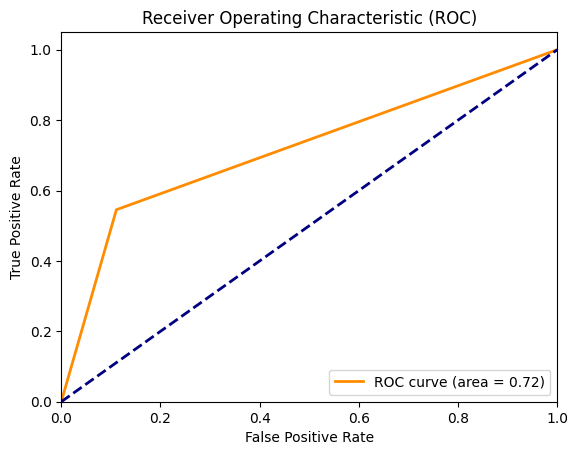

Sensitivity: 0.545
AUC: 0.717


In [ ]:
#when the average is taken for both surgical steps value for mean TN, FN , TP , FP.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Updated values
TP = 6
FN = 5
TN = 8
FP = 1


# Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Plotting the ROC curve
# For simplicity, let's use these values as the ROC points
fpr = [0, 1 - specificity, 1]  # False Positive Rate
tpr = [0, sensitivity, 1]      # True Positive Rate

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print Sensitivity and AUC
print(f"Sensitivity: {sensitivity:.3f}")
print(f"AUC: {roc_auc:.3f}")

<ipython-input-112-0396f224b63b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ruf5[col], fit=norm, kde=False)


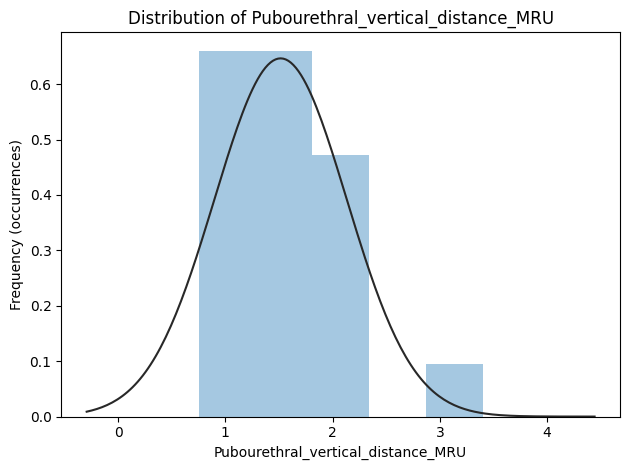

In [ ]:
# Plot distribution plots with normal distribution curve
columns_to_plot = ruf5.columns[:-1]  # Exclude 'Surgical_Steps'

# plt.figure(figsize=(10, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create a vertical layout
    sns.distplot(ruf5[col], fit=norm, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (occurrences)')

plt.tight_layout()
plt.show()